## Cifrado por Sustitución
**Objetivo:**
Implementar análisis de frecuencia para descifrar textos cifrados por el algoritmo de sustitución. A continuación, se describen los pasos a implementar. 

1. Determinar el alfabeto para el cripto-sistema de sustitución. 
2. Generar una llave de cifrado para el cripto-sistema de sustitución. 
3. Cifrar un texto plano (por ejemplo, un artículo de Wikipedia) con la llave generada anteriormente. 
4. Crear un histograma para representar la distribución de los caracteres del espacio de textos planos. 
5. Crear un histograma para representar la distribución de los caracteres del espacio de textos cifrados. 
6. Comparar ambas distribuciones (histogramas) para descifrar textos cifrados. 

In [136]:
# imports
import random
import numpy as np
import matplotlib.pyplot as plt
import re

In [137]:
# Funciones y variables
A = r"[^A-Za-z0-9 ]+"

# función para leer archivo
def readTextFromFile(file):
  with open(f'{file}', 'r') as f:
    text = f.read()
    text = re.sub(A, '', text)
    return [*text]
  
# funcion para cifrar
def encrypt(plaintext, key):
    ciphertext = ''
    for i in range(len(plaintext)):
        ciphertext += key[A.find(plaintext[i])]
    return ciphertext

In [138]:
# 1. Tomar texto de wikipedia (medium*) y construir un histograma en base a él
randomTextFromWikipedia1 = readTextFromFile("./wikipedia1.txt")

# contrucción de eje (x) y eje (y) para texto no cifrado
letters, counts = np.unique(randomTextFromWikipedia1, return_counts=True)

In [139]:
# 2. Generar una llave privada (permutaciones)

# A = ' 0123456789ABCDHIJKLMOPRSTabcdefghiklmnopqrstuvwyz'
A = ''.join(map(str, letters))
PI = ''.join(random.sample(list(A),len(A)))  # random key "permutation"

print(A)
print(PI)

 0123456789ABCDEFGHIJKLMNOPQRSTUVWYZabcdefghijklmnopqrstuvwxyz
alPpRsFDkSMG mhUv0BxqgdwQH6zjOYoT4rLycZ8u1iC3bKVIWet759NAEfn2J


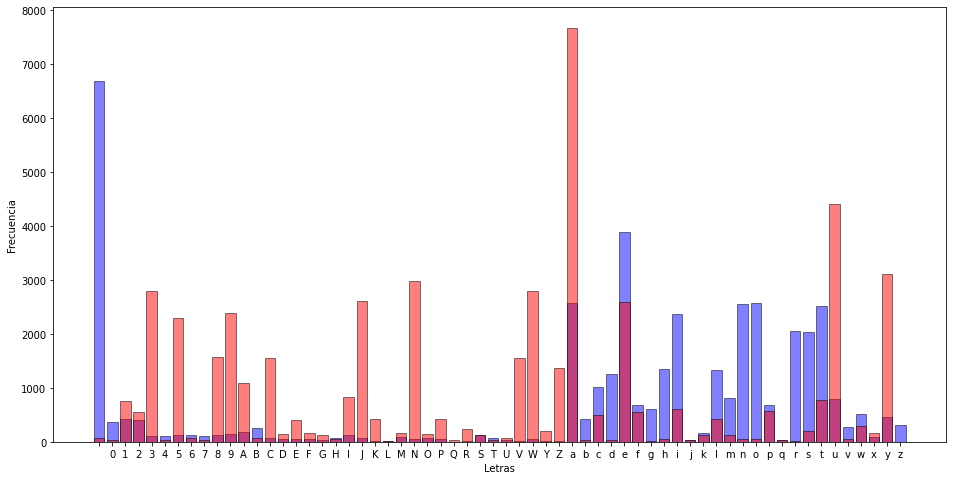

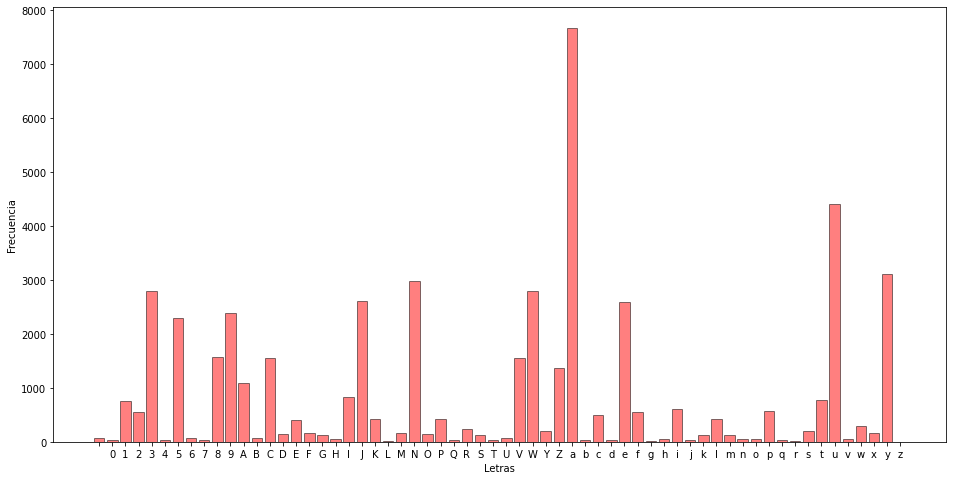

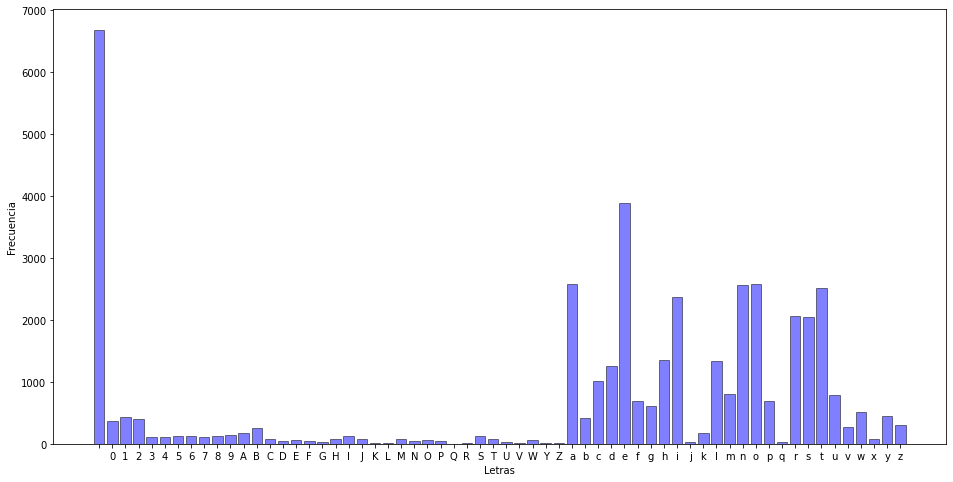

In [140]:
# Tomar otro texto de wikipedia y lo cifran
  
randomTextFromWikipedia2 = readTextFromFile("./wikipedia2.txt")

# contrucción de eje (x) y eje (y) para texto cifrado
encryptedText = encrypt(randomTextFromWikipedia2, PI)
letters2, counts2 = np.unique([*encryptedText], return_counts=True)


# Dos graficas: Cifrada y no cifrada
plt.figure(figsize=(16,8))
plt.xlabel('Letras')
plt.ylabel('Frecuencia')
plt.bar(letters,counts,color='blue',edgecolor = "black", alpha=0.5)
plt.bar(letters2,counts2,color='red',edgecolor = "black", alpha=0.5)
plt.show()

# Grafica texto cifrado
plt.figure(figsize=(16,8))
plt.xlabel('Letras')
plt.ylabel('Frecuencia')
plt.bar(letters2,counts2,color='red',edgecolor = "black", alpha=0.5)
plt.show()

# Grafica texto no cifrado
plt.figure(figsize=(16,8))
plt.xlabel('Letras')
plt.ylabel('Frecuencia')
plt.bar(letters,counts,color='blue',edgecolor = "black", alpha=0.5)
plt.show()
